In [1]:
from typing import Tuple, List

import numpy as np
import matplotlib.pyplot as plt

A = np.array(
    (
        (10, 5, 3, 4),
        (4, 10, 2, 1),
        (1, 3, 8, 2),
        (1,6,3,9)
    )
)

b = np.array((4, -5, 4, -11))

print(f"A eigenvalues: {np.linalg.eigvals(A)}")
print(f"Spectral Radius of A: {np.max(np.abs(np.linalg.eigvals(A)))}")
# I know, I know, calling inv() directly is bad...
iter_matrix = np.eye(4) - np.linalg.inv(np.tril(A)) @ A
print(f"Iter matrix eigenvalues: {np.linalg.eigvals(iter_matrix)}")
print(f"Spectral Radius of Iter matrix: {np.max(np.abs(np.linalg.eigvals(iter_matrix)))}")

A eigenvalues: [17.95212693+0.j          6.34589415+2.02724198j  6.34589415-2.02724198j
  6.35608477+0.j        ]
Spectral Radius of A: 17.952126930707212
Iter matrix eigenvalues: [8.32667268e-17+0.j         1.22411671e-01+0.11153473j
 1.22411671e-01-0.11153473j 1.01287769e-01+0.j        ]
Spectral Radius of Iter matrix: 0.16560378037293558


[ 1. -1.  1. -1.]
n: 4
Converged at iteration 9
[ 0.99999972 -0.99999982  1.00000021 -1.00000016]


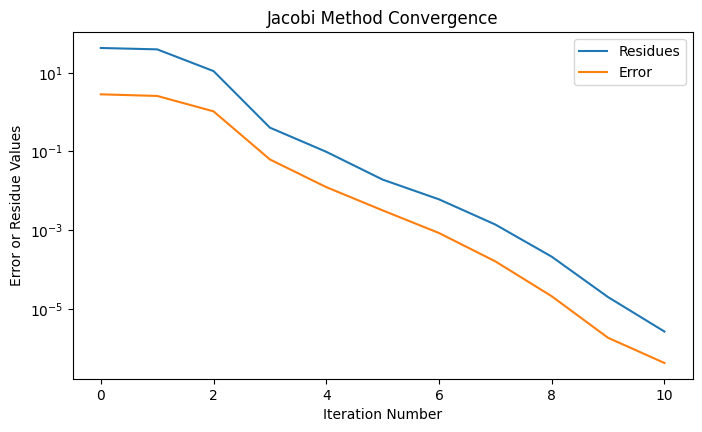

In [2]:
x_exact = np.linalg.solve(A, b)
print(x_exact)
err_func = lambda xk: np.linalg.norm(xk - x_exact)

def residual(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float:
    return np.linalg.norm(b - A@x)

def Jacobi(
    A: np.ndarray,
    b: np.ndarray,
    x0: np.ndarray,
    k_max: int=1000,
    res_max: float=1e-5
) -> Tuple[np.ndarray, List[float], List[float]]:
    n = A.shape[0]
    print("n:", n)
    xk = np.copy(x0)
    # "Iteration 0"
    residuals = [residual(A, xk, b)]
    errors = [err_func(xk)]
    xkp1 = np.zeros_like(xk)
    for i in range(n):
        for k in range(k_max):
            for i in range(n):
                sigma = 0
                for j in range(n):
                    if j != i:
                        sigma += A[i,j]*xk[j]
                xkp1[i] = (b[i]-sigma)/A[i,i]
            xk = xkp1
            res = residual(A, xk, b)
            err = err_func(xk)
            residuals.append(res)
            errors.append(err)

            if res < res_max:
                print(f"Converged at iteration {k}")
                return xk, residuals, errors
    else:
        print(f"Failed to converge in {k_max} iterations!")
        return xk, residuals, errors



x_jac, jac_res, jac_error = Jacobi(A, b, np.array((1.,1.,1.,1.)))
print(x_jac)
plt.figure(figsize=(8,4.5))
plt.semilogy(jac_res, label="Residues")
plt.semilogy(jac_error, label="Error")
plt.xlabel("Iteration Number")
plt.ylabel("Error or Residue Values")
plt.title("Jacobi Method Convergence")
plt.legend()
plt.show()

Converged at iteration 14
[ 0.99999967 -0.99999998  1.00000025 -0.9999994 ]


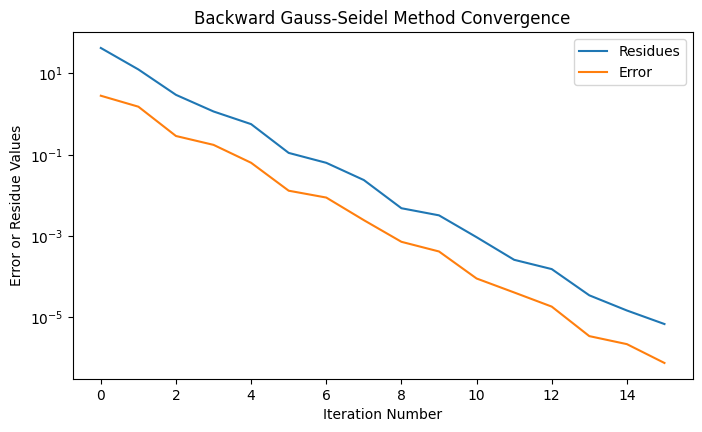

In [3]:
def backward_Gauss_Seidel(
    A: np.ndarray,
    b: np.ndarray,
    x0: np.ndarray,
    k_max: int = 1000,
    res_max: float=1e-5
) -> Tuple[np.ndarray, List[float], List[float]]:
    n = A.shape[0]
    xk = x0
    # "Iteration 0"
    residuals = [residual(A, xk, b)]
    errors = [err_func(xk)]
    for k in range(k_max):
        xkp1 = xk
        for i in reversed(range(n)):
            # j > i
            sum1 = np.sum(A[i, i+1:]*xk[i+1:])
            # j < i
            sum2 = np.sum(A[i, 0:i]*xk[:i])
            xkp1[i] = (b[i] - sum1 - sum2)/A[i, i]

        xk = xkp1

        res = residual(A, xk, b)
        err = err_func(xk)
        residuals.append(res)
        errors.append(err)
        
        if res < res_max:
            print(f"Converged at iteration {k}")
            return xk, residuals, errors
    else:
        print(f"Failed to converged in {k_max} iterations!")
        return xk, residuals, errors

x_bgs, bgs_res, bgs_err = backward_Gauss_Seidel(A, b, np.array((1.,1.,1.,1.)))
print(x_bgs)
plt.figure(figsize=(8,4.5))
plt.semilogy(bgs_res, label="Residues")
plt.semilogy(bgs_err, label="Error")
plt.xlabel("Iteration Number")
plt.ylabel("Error or Residue Values")
plt.title("Backward Gauss-Seidel Method Convergence")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Spectral Radius of the iteration matrix I-M⁻¹A')

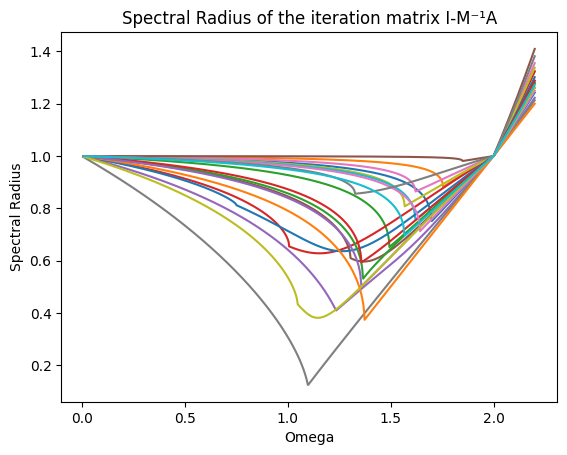

In [23]:
def gen_PD_matrix(n: int) -> np.ndarray:
    tmp = np.random.randn(n,n)
    return tmp @ tmp.T

omegas = np.linspace(0.01, 2.20, num=1000, endpoint=True)
plt.figure()
for _ in range(20):
    A_tmp = gen_PD_matrix(4)
    D = np.diag(np.diag(A_tmp))
    L = np.tril(A_tmp, -1)
    radii = []
    for omega in omegas:
        M = (1.0 / omega) * D + L
        radius = np.max(np.abs(np.linalg.eigvals(np.eye(4)-np.linalg.inv(M) @ A_tmp)))
        radii.append(radius)
    plt.plot(omegas, radii)

plt.xlabel("Omega")
plt.ylabel("Spectral Radius")
plt.title(f"Spectral Radius of the iteration matrix I-M\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}A")